In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv('dulieuxettuyendaihoc.csv')
df_sorted = df.sort_values(by=['DH1'], ascending=True)
print("--- 10 dòng đầu tiên sau khi sắp xếp tăng dần theo DH1 ---")
print(df_sorted[['STT', 'DH1', 'DH2', 'DH3']].head(10))


--- 10 dòng đầu tiên sau khi sắp xếp tăng dần theo DH1 ---
    STT   DH1   DH2   DH3
53   54  1.00  5.50  4.25
43   44  1.25  3.50  5.00
72   73  1.50  4.50  5.50
5     6  1.50  4.00  6.00
87   88  1.75  4.00  4.50
83   84  1.75  4.75  6.00
79   80  2.00  3.50  5.50
73   74  2.00  4.50  3.75
57   58  2.00  5.50  5.00
12   13  2.00  4.50  5.00


# Phần 1: Thống kê dữ liệu

#### Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [12]:
df_sorted_dh1 = df.sort_values(by='DH1')
print(df_sorted_dh1[['DH1']].head(10))


     DH1
53  1.00
43  1.25
72  1.50
5   1.50
87  1.75
83  1.75
79  2.00
73  2.00
57  2.00
12  2.00


Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính#### 1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked

In [13]:
df_sorted_dh2_gt = df.sort_values(by=['GT', 'DH2'])
print(df_sorted_dh2_gt[['GT', 'DH2']].head(10))


   GT   DH2
95  F  1.50
25  F  2.00
24  F  2.25
46  F  2.25
13  F  2.75
21  F  3.00
0   F  3.25
51  F  3.25
8   F  3.50
22  F  3.50


Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT

In [14]:
def get_quantile(q):
    def quantile(x):
        return x.quantile(q)
    quantile.__name__ = f'Q{int(q*100)}'
    return quantile

functions = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', get_quantile(0.25), get_quantile(0.5), get_quantile(0.75)]
pivot_kt = df.pivot_table(values='DH1', index='KT', aggfunc=functions)
print(pivot_kt)


   count     sum      mean median   min   max       std     Q25   Q50    Q75
     DH1     DH1       DH1    DH1   DH1   DH1       DH1     DH1   DH1    DH1
KT                                                                          
A     49  163.50  3.336735   3.25  1.00  6.50  1.274296  2.2500  3.25  4.250
A1     6   17.50  2.916667   3.00  2.00  4.25  0.861201  2.1875  3.00  3.250
B      9   29.50  3.277778   3.50  1.75  4.50  0.823905  3.2500  3.50  3.750
C     14   79.25  5.660714   5.25  4.75  7.00  0.812209  5.0625  5.25  6.375
D1    22   84.25  3.829545   3.75  1.25  6.75  1.370146  3.0000  3.75  4.875


Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV#### 3. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2 

In [15]:
pivot_kt_kv = df.pivot_table(values='DH1', index=['KT', 'KV'], aggfunc=functions)
print(pivot_kt_kv)


       count    sum      mean median   min   max       std     Q25    Q50  \
         DH1    DH1       DH1    DH1   DH1   DH1       DH1     DH1    DH1   
KT KV                                                                       
A  1      29  93.75  3.232759  3.250  1.00  6.50  1.369194  2.0000  3.250   
   2       9  31.75  3.527778  3.500  2.00  6.25  1.427653  2.2500  3.500   
   2NT    11  38.00  3.454545  3.500  2.00  4.75  0.913908  2.8750  3.500   
A1 1       2   4.75  2.375000  2.375  2.00  2.75  0.530330  2.1875  2.375   
   2NT     4  12.75  3.187500  3.250  2.00  4.25  0.921389  2.9375  3.250   
B  1       8  25.75  3.218750  3.375  1.75  4.50  0.860207  3.0000  3.375   
   2NT     1   3.75  3.750000  3.750  3.75  3.75       NaN  3.7500  3.750   
C  1       8  43.50  5.437500  5.250  4.75  7.00  0.728869  5.0000  5.250   
   2       2  11.50  5.750000  5.750  5.00  6.50  1.060660  5.3750  5.750   
   2NT     4  24.25  6.062500  6.000  5.25  7.00  0.943729  5.2500  6.000   

Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT

In [16]:
pivot_kt_kv_dt = df.pivot_table(values='DH1', index=['KT', 'KV', 'DT'], aggfunc=functions)
print(pivot_kt_kv_dt)


          count   sum  mean median   min   max   Q25   Q50   Q75
            DH1   DH1   DH1    DH1   DH1   DH1   DH1   DH1   DH1
KT KV DT                                                        
A  2  6.0     1  4.25  4.25   4.25  4.25  4.25  4.25  4.25  4.25
D1 1  1.0     1  3.00  3.00   3.00  3.00  3.00  3.00  3.00  3.00
   2  1.0     1  1.25  1.25   1.25  1.25  1.25  1.25  1.25  1.25


#### Phần 2

Hãy trình bày dữ liệu biến: GT

    TanSo  TanSuat(%)
GT                   
M      52        52.0
F      48        48.0


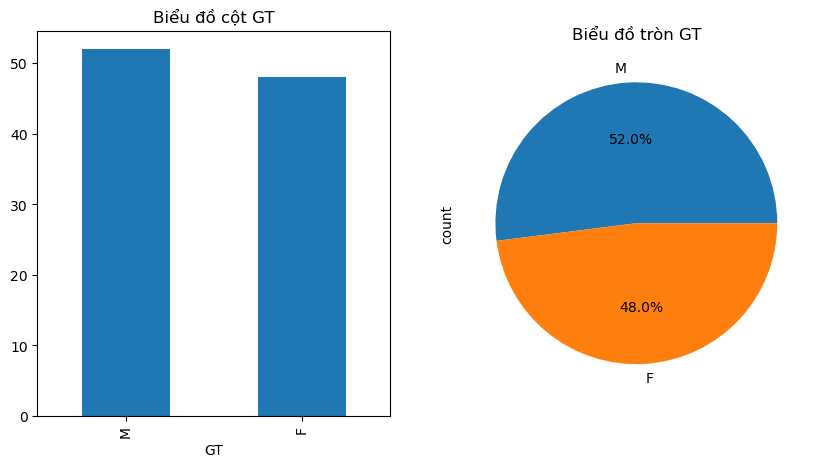

In [17]:
import matplotlib.pyplot as plt

# Bảng tần số và tần suất
gt_counts = df['GT'].value_counts()
gt_percent = df['GT'].value_counts(normalize=True) * 100
gt_table = pd.DataFrame({'TanSo': gt_counts, 'TanSuat(%)': gt_percent})
print(gt_table)

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
gt_counts.plot.bar(ax=axes[0], title='Biểu đồ cột GT')
gt_counts.plot.pie(ax=axes[1], autopct='%1.1f%%', title='Biểu đồ tròn GT')
plt.show()


Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3

In [18]:
print(df[['US_TBM1', 'US_TBM2', 'US_TBM3']].describe())

df[['US_TBM1', 'US_TBM2', 'US_TBM3']].hist(figsize=(10, 5))
plt.show()


KeyError: "None of [Index(['US_TBM1', 'US_TBM2', 'US_TBM3'], dtype='object')] are in the [columns]"

Hãy trình bày dữ liệu biến DT với các học sinh là nam

In [ ]:
print(df[df['GT'] == 'M']['DT'].value_counts())


DT
0.0    50
1.0     1
6.0     1
Name: count, dtype: int64


Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thỏa mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0)

In [ ]:
# Giả sử DT = 0 là Kinh (dựa trên dữ liệu fillna=0 ở Lab 1)
cond = (df['GT'] == 'M') & (df['DT'] == 0) & (df['DH1'] >= 5.0) & (df['DH2'] >= 4.0) & (df['DH3'] >= 4.0)
print(df[cond]['KV'].value_counts())


KV
1      2
2      2
2NT    2
Name: count, dtype: int64


Hãy trình bày dữ liệu lần lượt các biến DH1, DH2, DH3 lớn hơn bằng 5.0 và thuộc khu vực 2NT

In [ ]:
cond_2nt = (df['KV'] == '2NT') & (df['DH1'] >= 5.0) & (df['DH2'] >= 5.0) & (df['DH3'] >= 5.0)
print(df[cond_2nt][['DH1', 'DH2', 'DH3']].head())


      DH1   DH2  DH3
STT                 
24   6.75  5.25  5.0


#### Phần 3

Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked

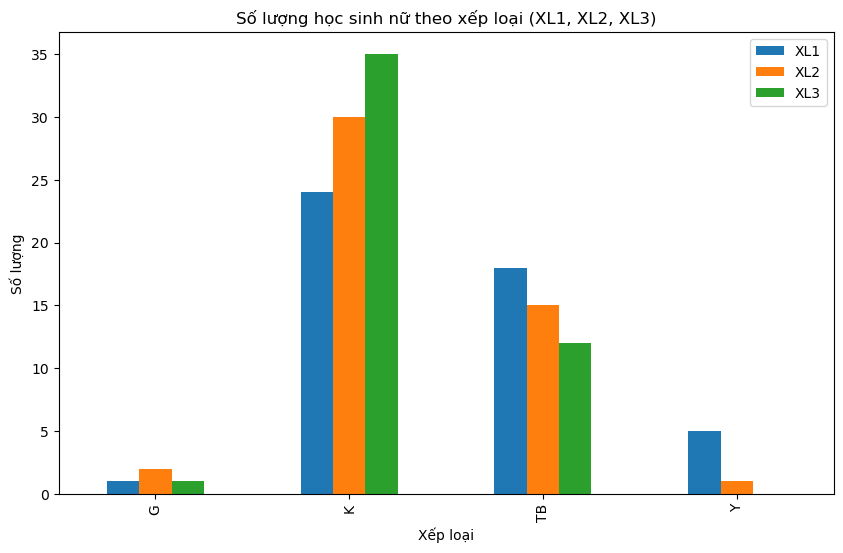

In [ ]:
df_female = df[df['GT'] == 'F']
# Gom nhóm và đếm số lượng
df_female_xl = df_female[['XL1', 'XL2', 'XL3']].apply(pd.Series.value_counts)

# Vẽ biểu đồ
df_female_xl.plot.bar(stacked=False, figsize=(10, 6))
plt.title("Số lượng học sinh nữ theo xếp loại (XL1, XL2, XL3)")
plt.ylabel("Số lượng")
plt.xlabel("Xếp loại")
plt.show()


 Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2

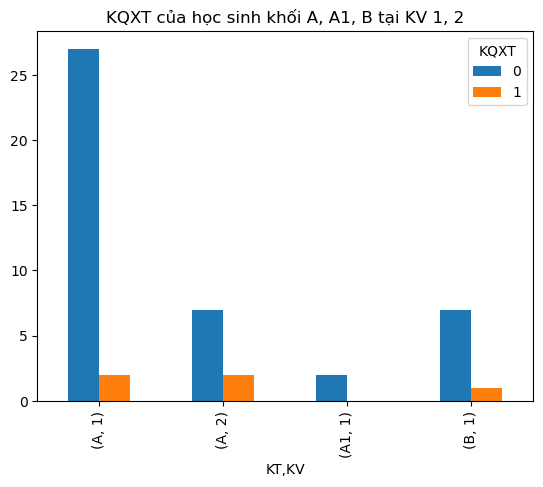

In [ ]:
cond_kv = df['KV'].isin(['1', '2'])
cond_kt = df['KT'].isin(['A', 'A1', 'B'])
df_filtered = df[cond_kv & cond_kt]

df_filtered.groupby(['KT', 'KV', 'KQXT'])['GT'].count().unstack().plot.bar(stacked=False)
plt.title("KQXT của học sinh khối A, A1, B tại KV 1, 2")
plt.show()


Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi

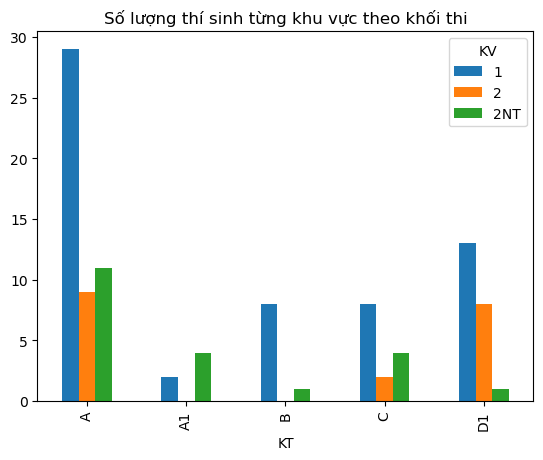

In [ ]:
df.groupby(['KT', 'KV'])['GT'].count().unstack().plot.bar(stacked=False)
plt.title("Số lượng thí sinh từng khu vực theo khối thi")
plt.show()


Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi

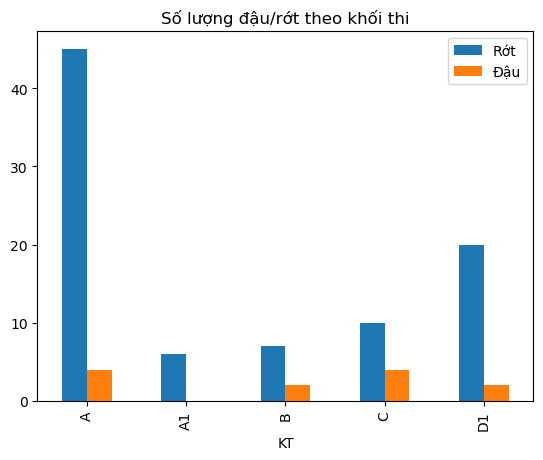

In [ ]:
df.groupby(['KT', 'KQXT'])['GT'].count().unstack().plot.bar(stacked=False)
plt.title("Số lượng đậu/rớt theo khối thi")
plt.legend(['Rớt', 'Đậu'])
plt.show()


 Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực

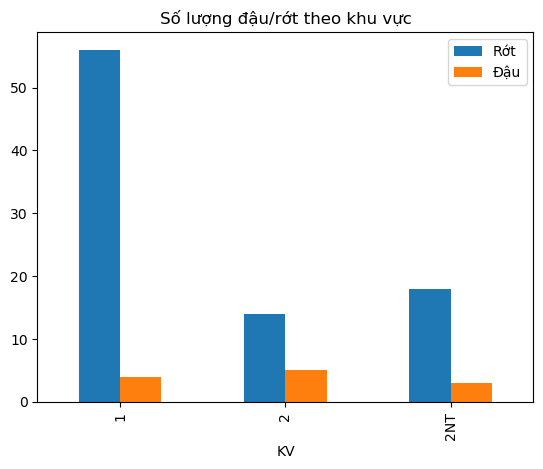

In [ ]:
df.groupby(['KV', 'KQXT'])['GT'].count().unstack().plot.bar(stacked=False)
plt.title("Số lượng đậu/rớt theo khu vực")
plt.legend(['Rớt', 'Đậu'])
plt.show()


Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc

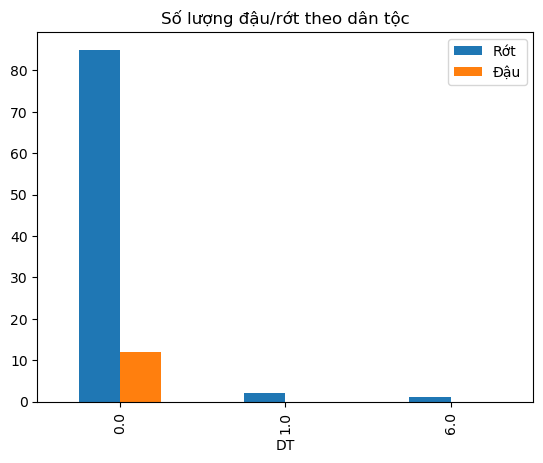

In [ ]:
df.groupby(['DT', 'KQXT'])['GT'].count().unstack().plot.bar(stacked=False)
plt.title("Số lượng đậu/rớt theo dân tộc")
plt.legend(['Rớt', 'Đậu'])
plt.show()


Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính

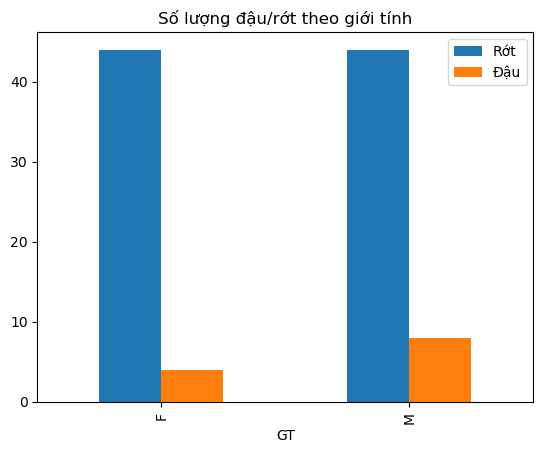

In [ ]:
df.groupby(['GT', 'KQXT'])['GT'].count().unstack().plot.bar(stacked=False)
plt.title("Số lượng đậu/rớt theo giới tính")
plt.legend(['Rớt', 'Đậu'])
plt.show()


#### Phần 4

Vẽ biểu đồ đường Simple cho biến T1

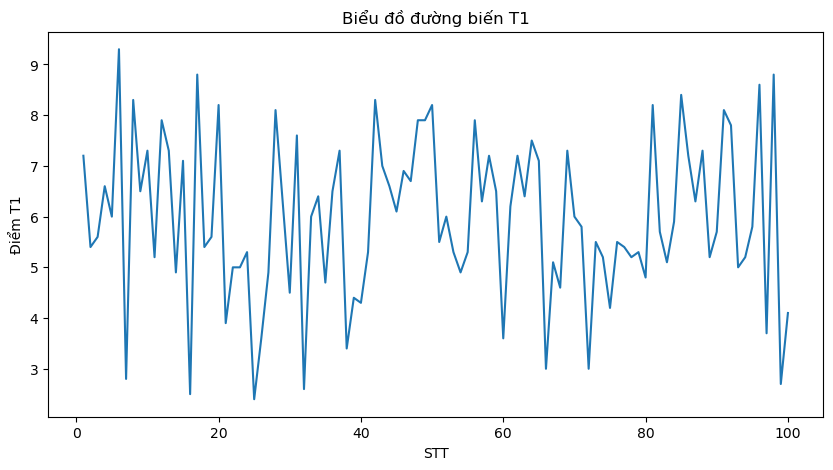

In [ ]:
df['T1'].plot.line(figsize=(10, 5))
plt.title("Biểu đồ đường biến T1")
plt.ylabel("Điểm T1")
plt.xlabel("STT")
plt.show()


Tạo biến phân loại (phanlopt1) cho môn toán (T1)

In [ ]:
# a. Từ 0 đến dưới 5 = kém (ký hiệu “k”)
# b. Từ 5 đến dưới 7 = trung bình (ký hiệu “tb”)
# c. Từ 7 đến dưới 8 = khá (ký hiệu “kh”) - Lưu ý: PDF ghi là "k" nhưng trùng với kém, nên mình đổi thành "kh"
# d. Từ 8 trở lên = giỏi (ký hiệu “g”)

def phan_loai_t1(score):
    if score < 5: return 'k'
    elif score < 7: return 'tb'
    elif score < 8: return 'kh'
    else: return 'g'

df['phanlopt1'] = df['T1'].apply(phan_loai_t1)
print(df[['T1', 'phanlopt1']].head())


      T1 phanlopt1
STT               
1    7.2        kh
2    5.4        tb
3    5.6        tb
4    6.6        tb
5    6.0        tb


Lập bảng tần số cho biến phanloait1

In [ ]:
print(df['phanlopt1'].value_counts())


phanlopt1
tb    46
k     23
kh    19
g     12
Name: count, dtype: int64


Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1

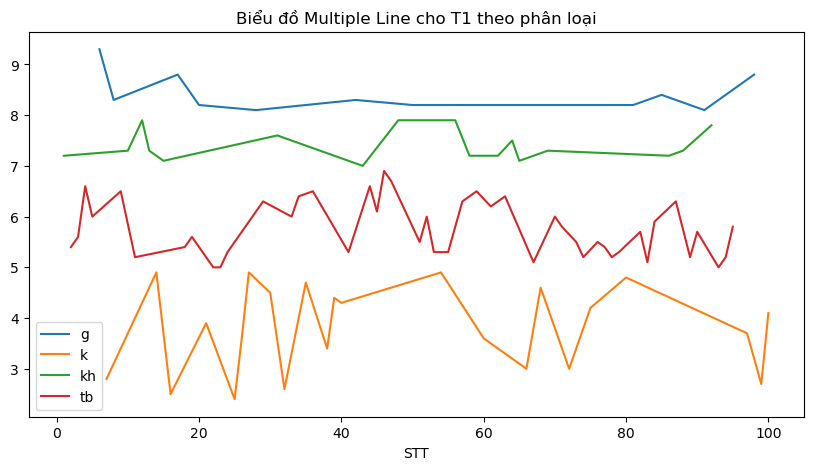

In [ ]:
# Gom nhóm theo phân loại và vẽ
df.groupby('phanlopt1')['T1'].plot.line(legend=True, figsize=(10, 5))
plt.title("Biểu đồ Multiple Line cho T1 theo phân loại")
plt.show()


Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1

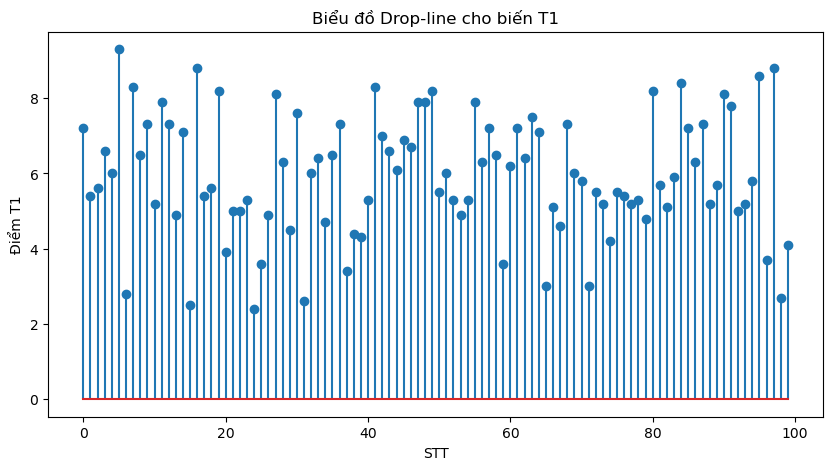

In [ ]:
# Drop-line thường được vẽ bằng stem plot trong matplotlib
plt.figure(figsize=(10, 5))
plt.stem(df['T1'])
plt.title("Biểu đồ Drop-line cho biến T1")
plt.xlabel("STT")
plt.ylabel("Điểm T1")
plt.show()


#### Phần 5

Hãy mô tả và khảo sát phân phối cho biến T1

count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64


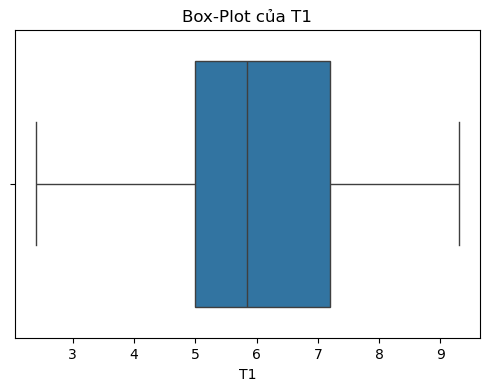

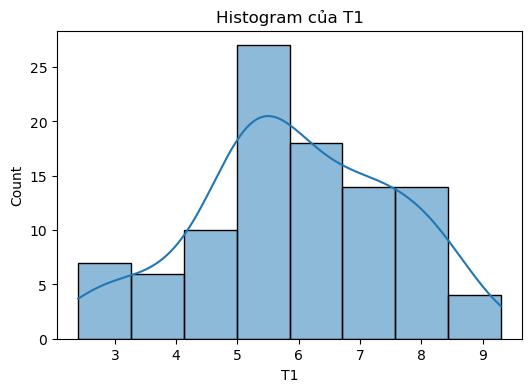

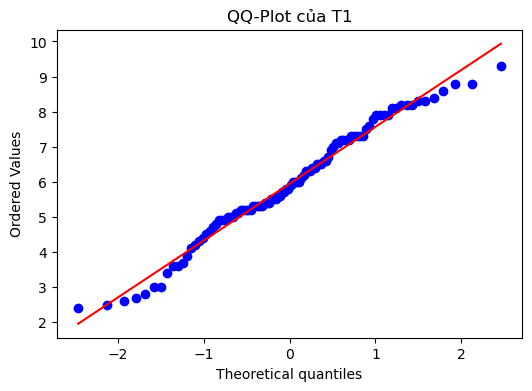

In [ ]:
# Mô tả độ tập trung và phân tán
print(df['T1'].describe())

# Vẽ biểu đồ Box-Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['T1'])
plt.title("Box-Plot của T1")
plt.show()

# Vẽ biểu đồ Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['T1'], kde=True)
plt.title("Histogram của T1")
plt.show()

# Kiểm chứng phân phối chuẩn QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(df['T1'], dist="norm", plot=plt)
plt.title("QQ-Plot của T1")
plt.show()


Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1)

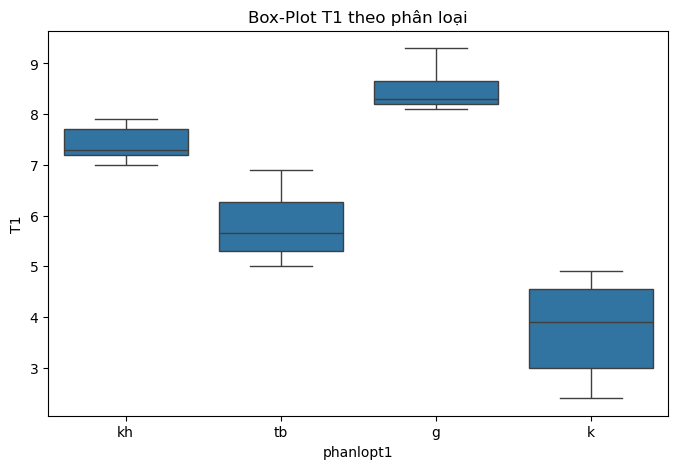

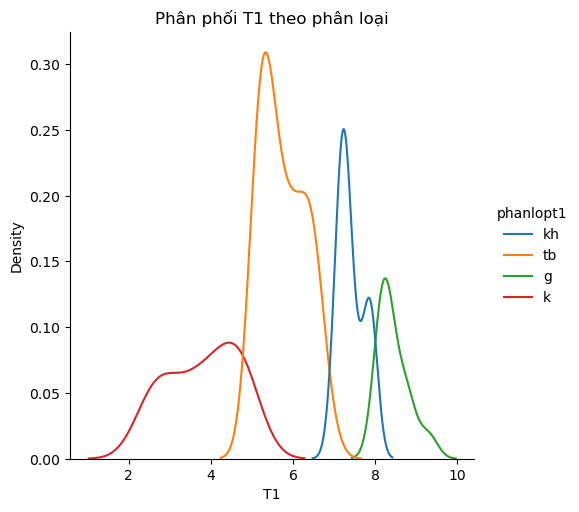

In [ ]:
# Box-plot theo nhóm
plt.figure(figsize=(8, 5))
sns.boxplot(y='T1', x='phanlopt1', data=df)
plt.title("Box-Plot T1 theo phân loại")
plt.show()

# Histogram theo nhóm (dùng FacetGrid hoặc hue)
sns.displot(df, x="T1", hue="phanlopt1", kind="kde")
plt.title("Phân phối T1 theo phân loại")
plt.show()


Hãy khảo sát tương quan giữa biến DH1 theo biến T1

Correlation coefficient: 0.04925439216104145


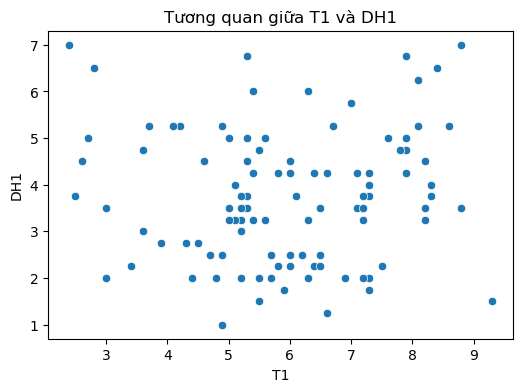

In [ ]:
# Tính hệ số tương quan
print("Correlation coefficient:", df['DH1'].corr(df['T1']))

# Biểu đồ Scatter
plt.figure(figsize=(6, 4))
sns.scatterplot(x='T1', y='DH1', data=df)
plt.title("Tương quan giữa T1 và DH1")
plt.show()


Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực

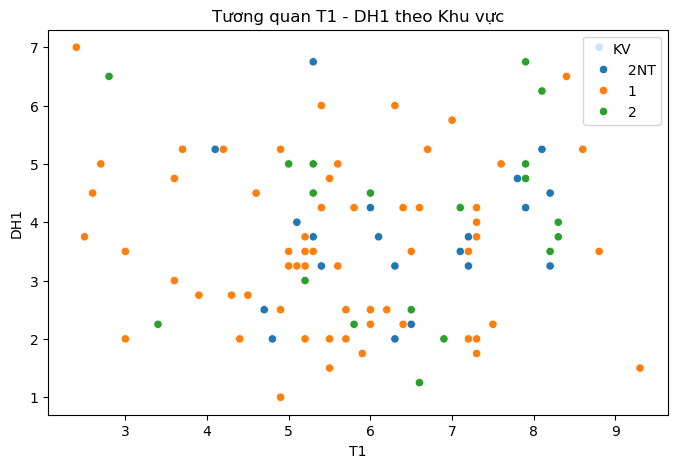

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='T1', y='DH1', hue='KV', data=df)
plt.title("Tương quan T1 - DH1 theo Khu vực")
plt.show()


Hãy khảo sát tương quan giữa các biến DH1, DH2, DH3

          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


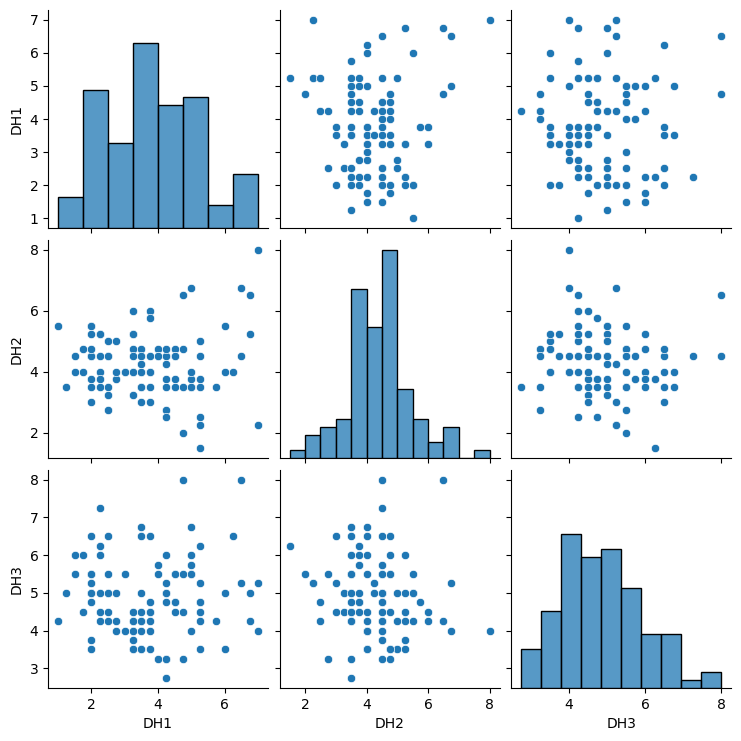

In [ ]:
# Ma trận tương quan
print(df[['DH1', 'DH2', 'DH3']].corr())

# Biểu đồ Pairplot
sns.pairplot(df[['DH1', 'DH2', 'DH3']])
plt.show()
